<a href="https://colab.research.google.com/github/Anchita2004/FUTURE_ML_01/blob/main/FUTURE_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the dependencies
!pip install prophet pandas matplotlib

In [2]:
#Essential libraries
import pandas as pd
import matplotlib.pyplot as pyplot
from prophet import Prophet

In [5]:
#Read the dataset
df = pd.read_csv("/content/mock_kaggle.csv")

In [6]:
#Print all the columns
print(df.columns)

Index(['data', 'venda', 'estoque', 'preco'], dtype='object')


In [7]:
df = df[['data', 'venda']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

/tmp/ipython-input-7-2275576404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [8]:
#Train the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslblbsmw/fozl_gpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslblbsmw/1v3lpybz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9072', 'data', 'file=/tmp/tmpslblbsmw/fozl_gpw.json', 'init=/tmp/tmpslblbsmw/1v3lpybz.json', 'output', 'file=/tmp/tmpslblbsmw/prophet_model7tm915um/prophet_model-20250709142520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
#Create future dataframe and forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

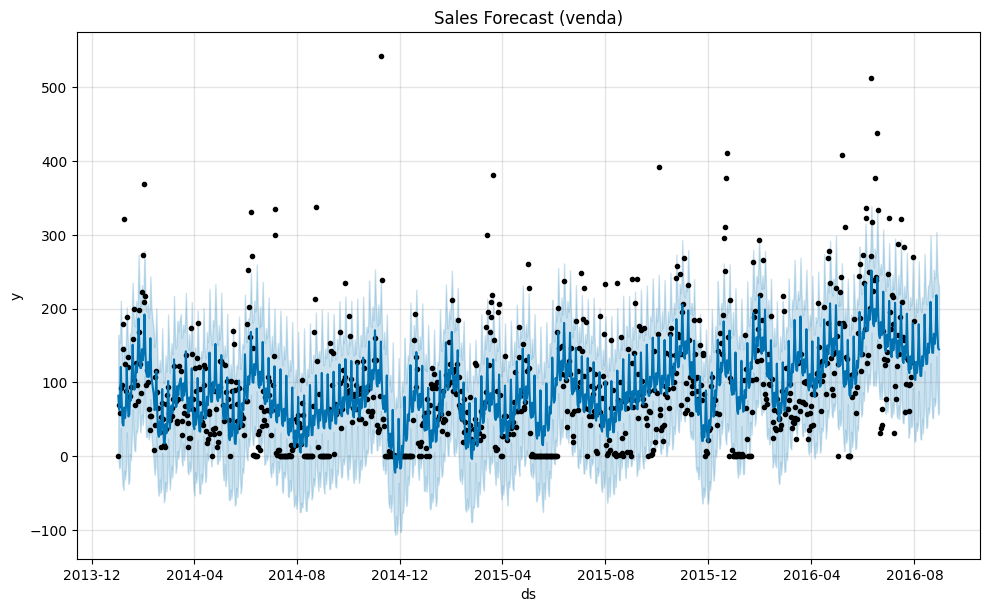

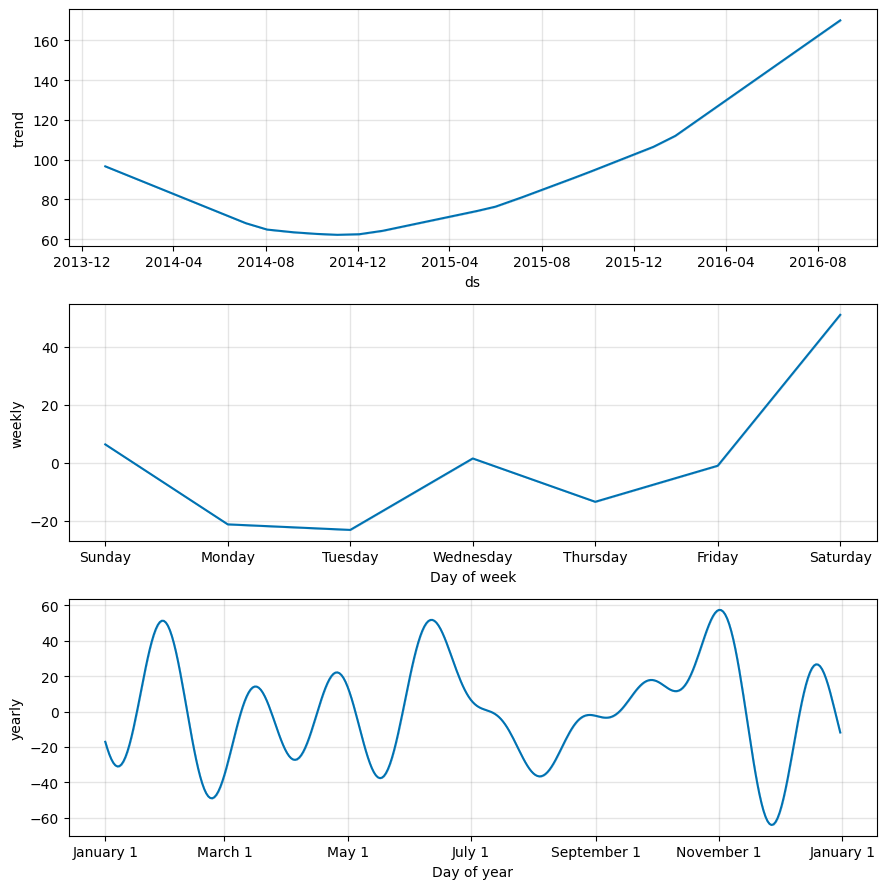

In [11]:
#Plot forecast and components
model.plot(forecast)
pyplot.title("Sales Forecast (venda)")
pyplot.show()

model.plot_components(forecast)
pyplot.show()